                                    Variable  Num_NaNs  Porcentaje
Event Site                        Event Site      1068       90.20
Event                                  Event      1062       89.70
Subtype                              Subtype       212       17.91
Survival Time (years)  Survival Time (years)        32        2.70


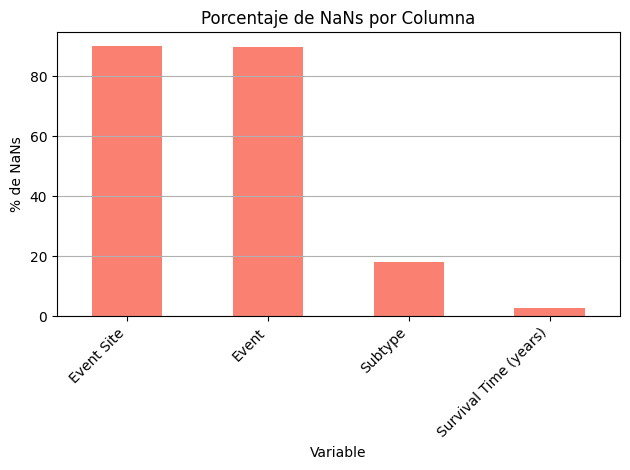

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score (excluyendo ruido): 0.691


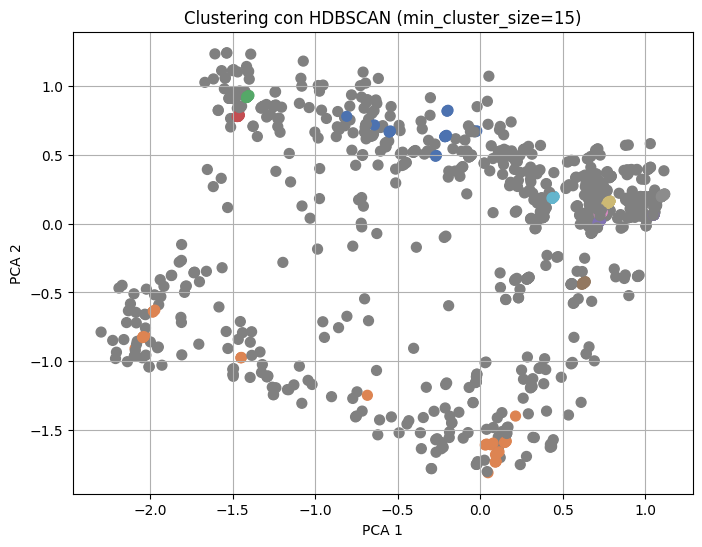

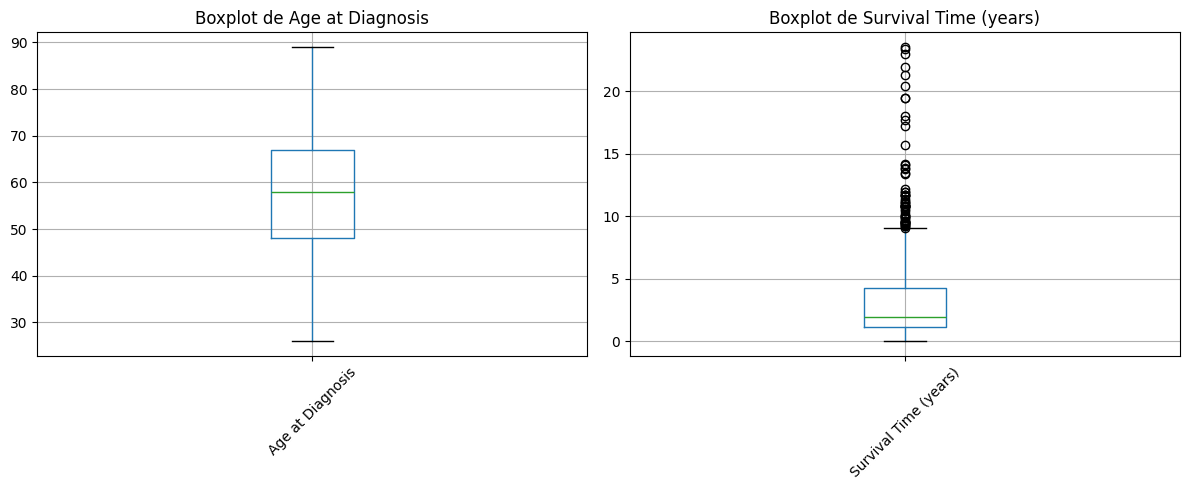

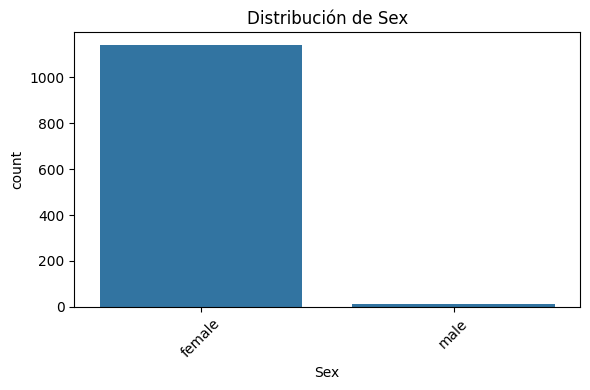

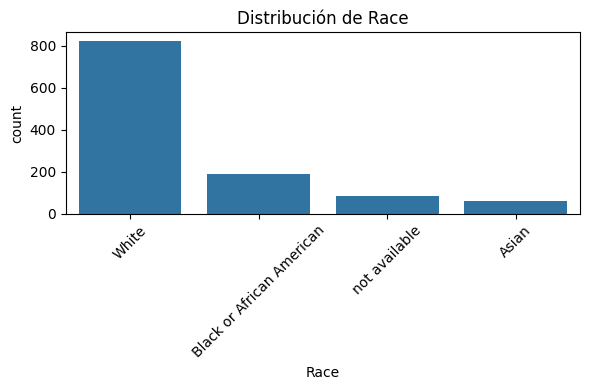

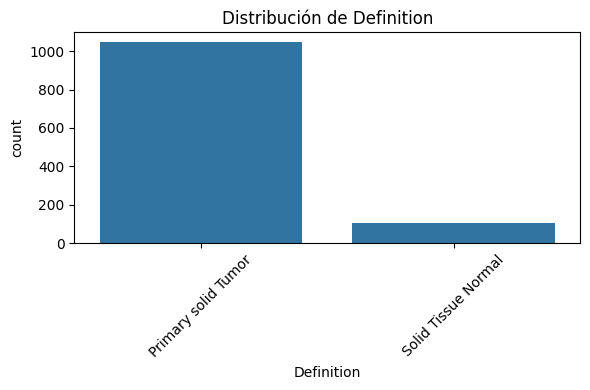

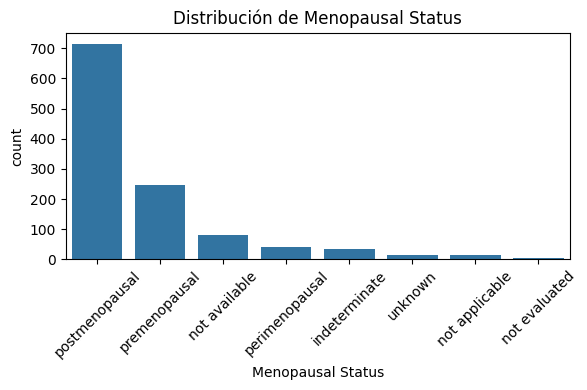

<ipython-input-1-1726279071>:111: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


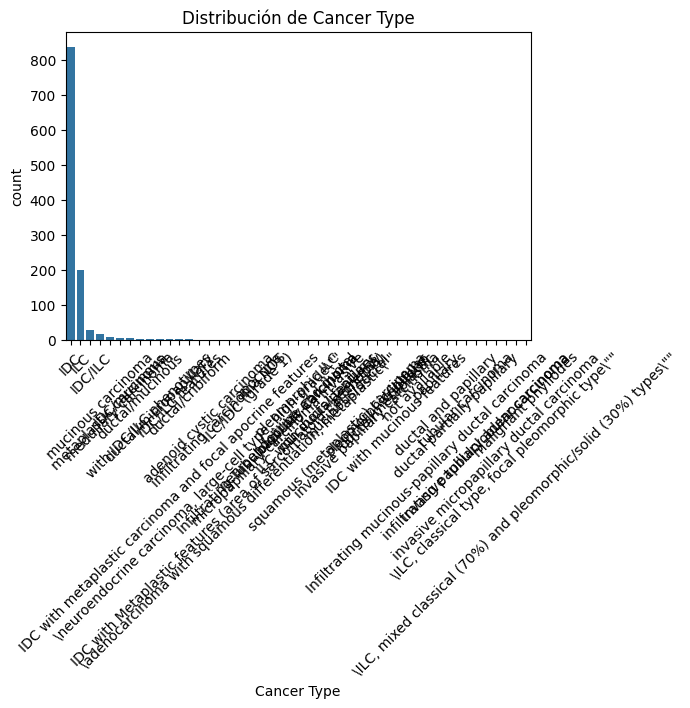

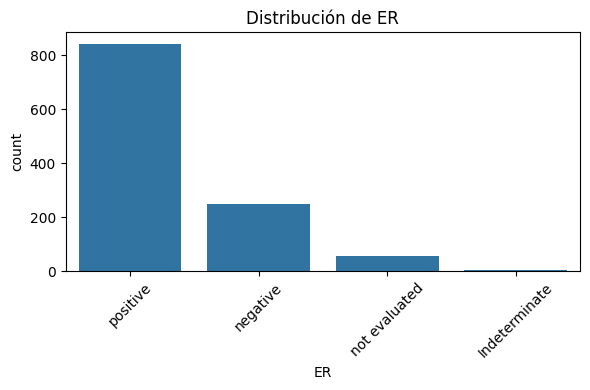

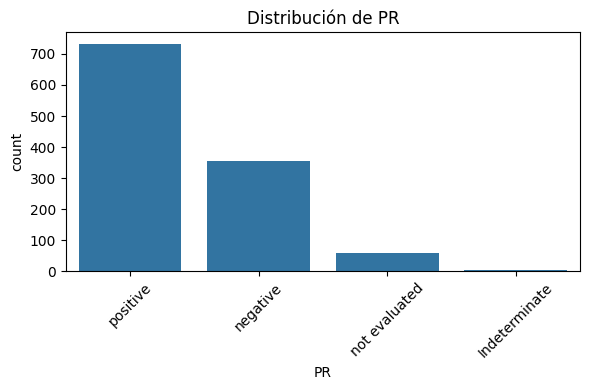

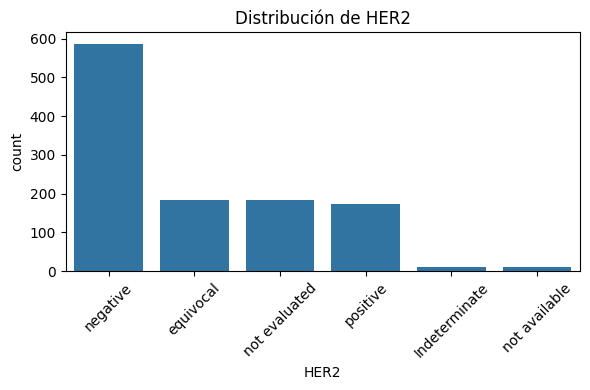

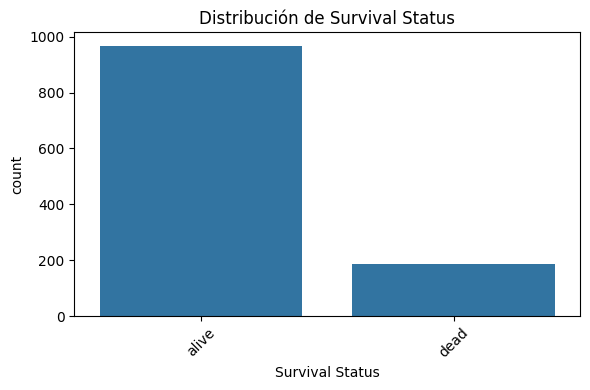

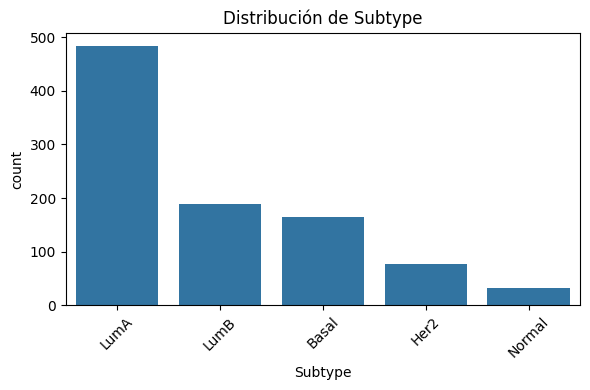

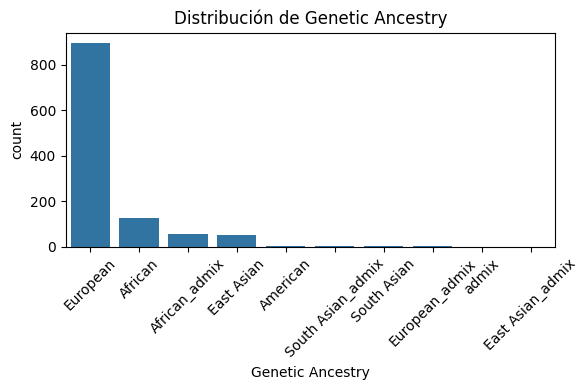

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=5, min_samples=None -> Silhouette: 0.669 con 36 clusters
min_cluster_size=5, min_samples=5 -> Silhouette: 0.669 con 36 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=5, min_samples=10 -> Silhouette: 0.669 con 16 clusters
min_cluster_size=10, min_samples=None -> Silhouette: 0.669 con 16 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=10, min_samples=5 -> Silhouette: 0.496 con 18 clusters
min_cluster_size=10, min_samples=10 -> Silhouette: 0.669 con 16 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=15, min_samples=None -> Silhouette: 0.691 con 10 clusters
min_cluster_size=15, min_samples=5 -> Silhouette: 0.438 con 13 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=15, min_samples=10 -> Silhouette: 0.579 con 12 clusters
min_cluster_size=20, min_samples=None -> Silhouette: 0.830 con 6 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=20, min_samples=5 -> Silhouette: 0.384 con 9 clusters
min_cluster_size=20, min_samples=10 -> Silhouette: 0.505 con 8 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=25, min_samples=None -> Silhouette: 0.825 con 4 clusters
min_cluster_size=25, min_samples=5 -> Silhouette: 0.381 con 7 clusters


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=25, min_samples=10 -> Silhouette: 0.437 con 6 clusters

🔝 Mejor configuración: min_cluster_size=20, min_samples=None, Silhouette=0.830


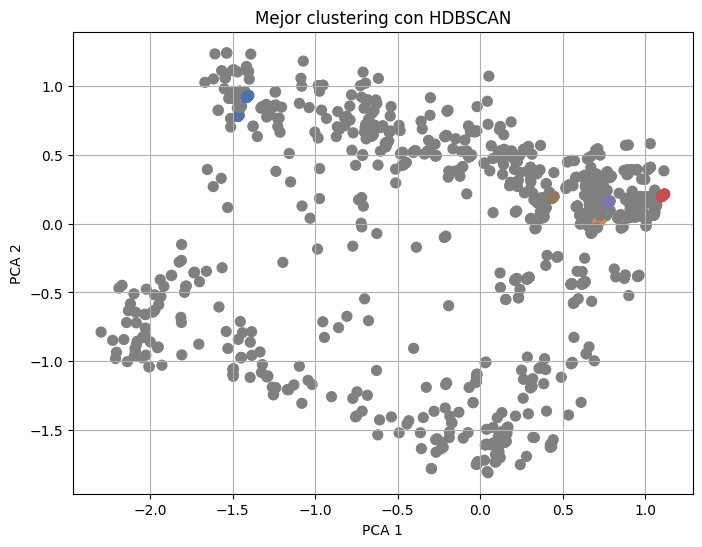

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import hdbscan  # Importar hdbscan

# Cargar datos
data = pd.read_excel('MetaData.xlsx')
df = pd.DataFrame(data)

# Resumen de NaNs
na_summary = pd.DataFrame({
    'Variable': df.columns,
    'Num_NaNs': df.isna().sum(),
    'Porcentaje': (df.isna().mean() * 100).round(2)
})
na_summary = na_summary[na_summary['Num_NaNs'] > 0].sort_values(by='Porcentaje', ascending=False)
print(na_summary)

# Gráfico NaNs
na_summary.plot(kind='bar', x='Variable', y='Porcentaje', legend=False, color='salmon')
plt.title("Porcentaje de NaNs por Columna")
plt.ylabel("% de NaNs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Limpiar columnas irrelevantes
df = df.drop(df.columns[[0, -1, 10, 11]], axis=1)

# Eliminar filas con NaN en 'Survival Time (years)'
df = df.dropna(subset=['Survival Time (years)'])

# Definir variables
numeric_vars = ['Age at Diagnosis', 'Survival Time (years)']
categorical_vars = ['Sex', 'Race', 'Definition', 'Menopausal Status', 'Cancer Type',
                    'ER', 'PR', 'HER2', 'Survival Status',
                    'Subtype', 'Genetic Ancestry']

# Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_vars),
    ('cat', categorical_transformer, categorical_vars)
])

# Preprocesar
X_processed = preprocessor.fit_transform(df)

# PCA para visualización (opcional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Aplicar HDBSCAN (ajusta min_cluster_size y otros parámetros)
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')
labels = clusterer.fit_predict(X_processed)

# Silhouette Score (solo para clusters asignados, -1 es ruido y se excluye)
mask = labels != -1
if len(set(labels[mask])) > 1:  # Hay más de un cluster válido
    score = silhouette_score(X_processed[mask], labels[mask])
    print(f"Silhouette Score (excluyendo ruido): {score:.3f}")
else:
    print("No hay suficientes clusters para calcular Silhouette Score excluyendo ruido.")

# Visualización con PCA y etiquetas de HDBSCAN
plt.figure(figsize=(8, 6))
palette = sns.color_palette('deep', np.max(labels) + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]  # Grises para ruido
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50)
plt.title(f"Clustering con HDBSCAN (min_cluster_size=15)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Diagramas de caja para variables numéricas
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_vars):
    plt.subplot(1, len(numeric_vars), i+1)
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribución variables categóricas
for col in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
from sklearn.metrics import silhouette_score
import hdbscan
import numpy as np

def probar_hdbscan(X, min_cluster_sizes=[5,10,15,20,25], min_samples_list=[None,5,10]):
    mejores_resultados = []

    for min_cluster_size in min_cluster_sizes:
        for min_samples in min_samples_list:
            clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                        min_samples=min_samples,
                                        metric='euclidean',
                                        cluster_selection_method='eom')
            labels = clusterer.fit_predict(X)

            mask = labels != -1  # excluye ruido

            n_clusters = len(set(labels[mask]))
            if n_clusters > 1:
                score = silhouette_score(X[mask], labels[mask])
                print(f"min_cluster_size={min_cluster_size}, min_samples={min_samples} -> Silhouette: {score:.3f} con {n_clusters} clusters")
                mejores_resultados.append((score, min_cluster_size, min_samples, labels))
            else:
                print(f"min_cluster_size={min_cluster_size}, min_samples={min_samples} -> No se forman clusters válidos")

    # Ordenar resultados por score descendente
    mejores_resultados.sort(key=lambda x: x[0], reverse=True)

    if mejores_resultados:
        mejor = mejores_resultados[0]
        print(f"\n🔝 Mejor configuración: min_cluster_size={mejor[1]}, min_samples={mejor[2]}, Silhouette={mejor[0]:.3f}")
        return mejor[3]  # Retorna las etiquetas del mejor modelo
    else:
        print("No se encontraron configuraciones con clusters válidos.")
        return None

# Ejecuta la función con tus datos procesados
best_labels = probar_hdbscan(X_processed)

# Visualiza resultado con PCA si hubo clustering válido
if best_labels is not None:
    X_pca = PCA(n_components=2).fit_transform(X_processed)
    import seaborn as sns
    import matplotlib.pyplot as plt

    palette = sns.color_palette('deep', np.max(best_labels) + 1)
    colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in best_labels]
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, s=50)
    plt.title("Mejor clustering con HDBSCAN")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

<ipython-input-5-b2e54311c68d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


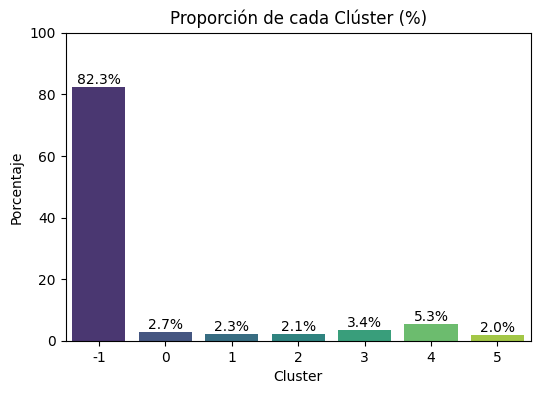

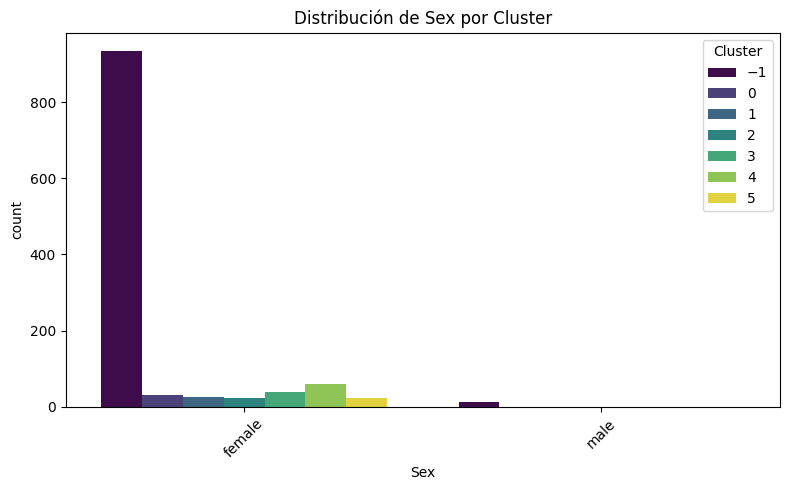

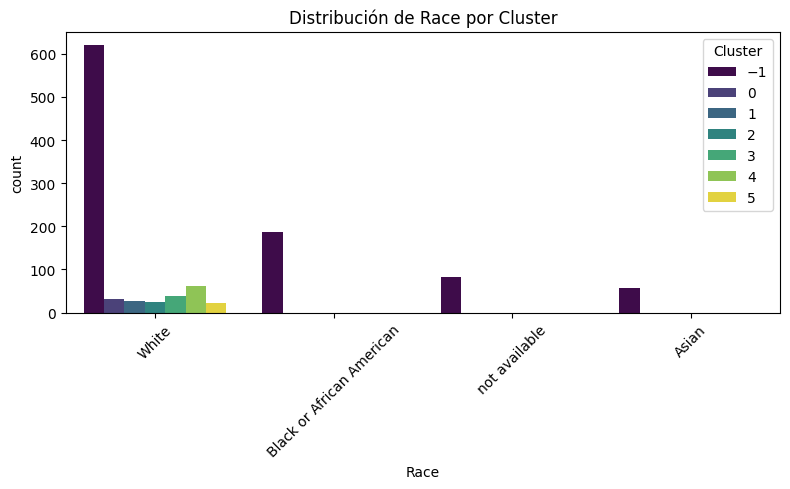

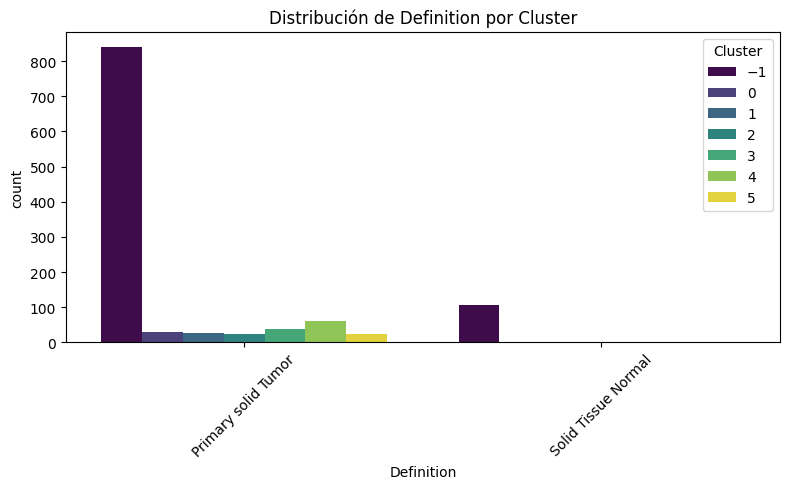

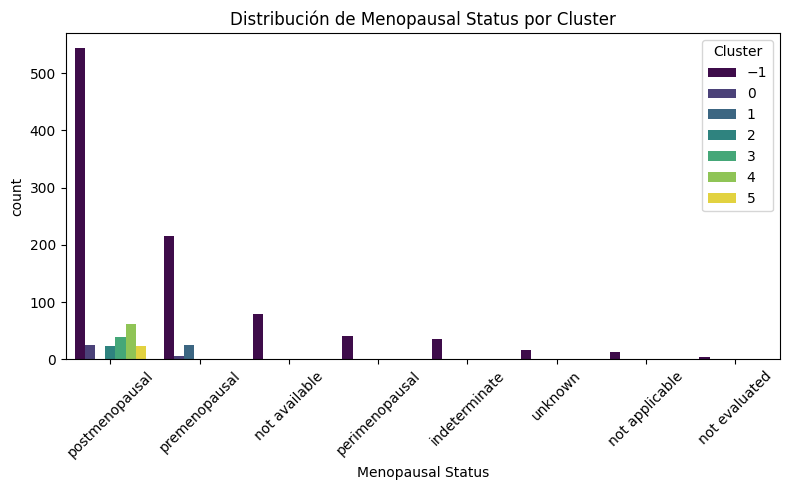

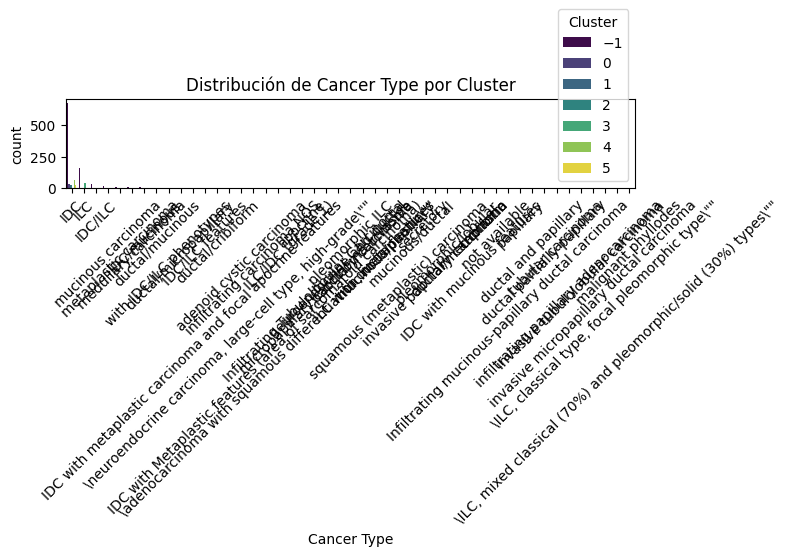

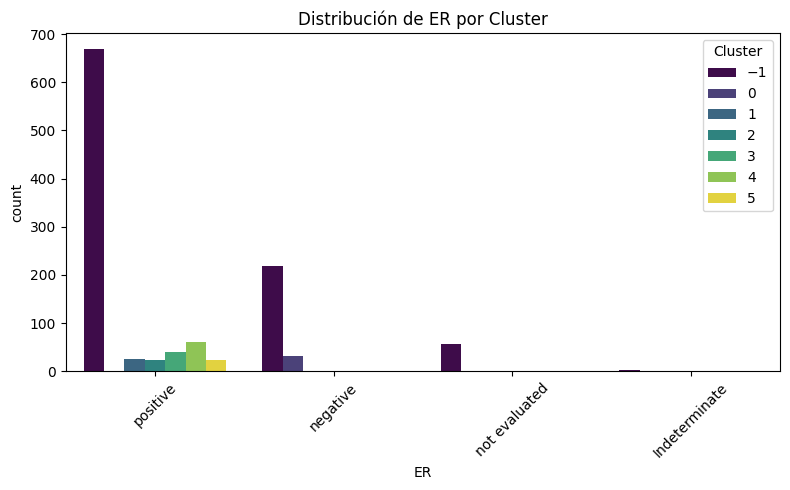

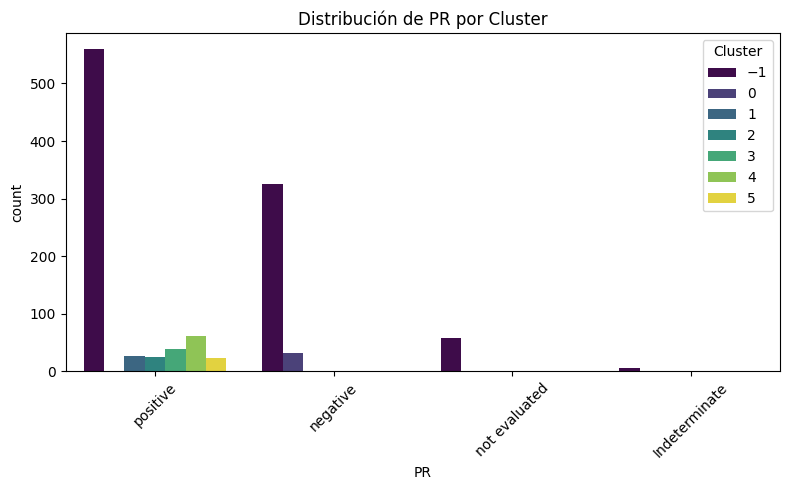

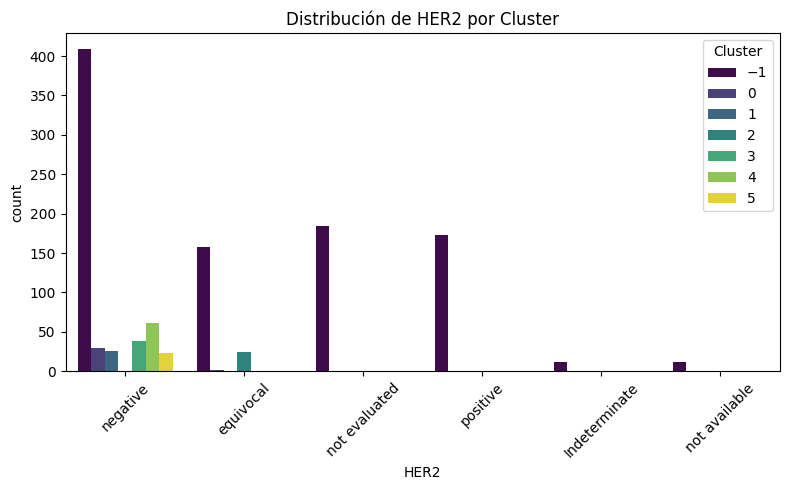

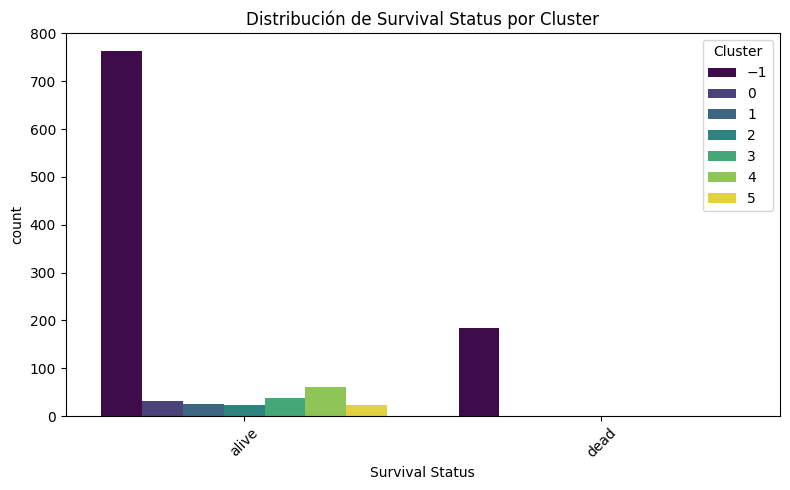

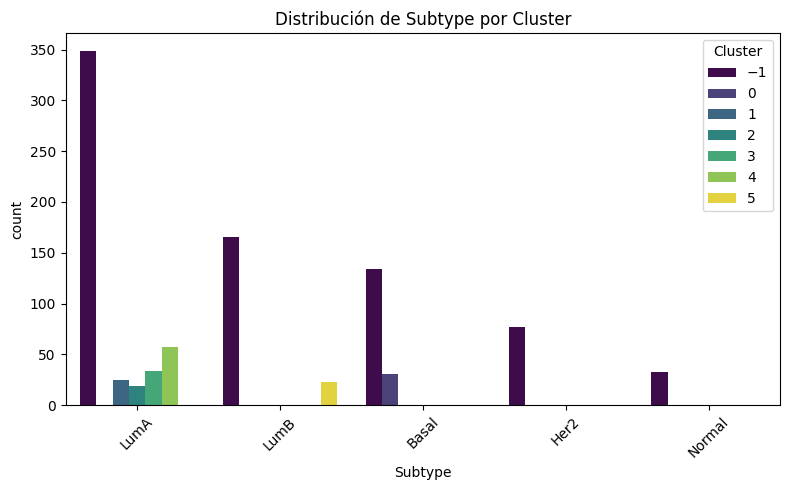

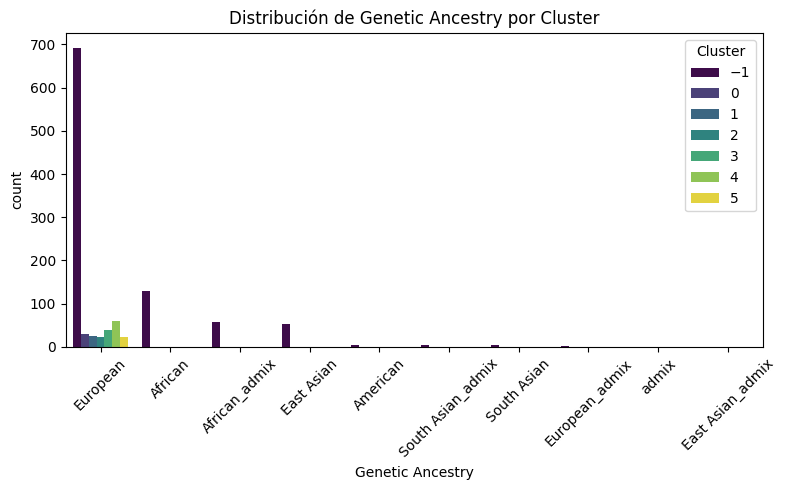

In [ ]:
cluster_counts = df['Cluster'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Proporción de cada Clúster (%)')
plt.xlabel('Cluster')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.show()
for col in categorical_vars:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue='Cluster', palette='viridis',
                  order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por Cluster')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


In [ ]:
for col in categorical_vars:
    prop_table = pd.crosstab(df['Cluster'], df[col], normalize='index') * 100
    print(f"\nProporción (%) de {col} por Cluster:")
    print(prop_table.round(2))



Proporción (%) de Sex por Cluster:
Sex      female  male
Cluster              
-1        98.63  1.37
 0       100.00  0.00
 1       100.00  0.00
 2       100.00  0.00
 3       100.00  0.00
 4       100.00  0.00
 5       100.00  0.00

Proporción (%) de Race por Cluster:
Race     Asian  Black or African American  White  not available
Cluster                                                        
-1        6.12                      19.73   65.4           8.76
 0        0.00                       0.00  100.0           0.00
 1        0.00                       0.00  100.0           0.00
 2        0.00                       0.00  100.0           0.00
 3        0.00                       0.00  100.0           0.00
 4        0.00                       0.00  100.0           0.00
 5        0.00                       0.00  100.0           0.00

Proporción (%) de Definition por Cluster:
Definition  Primary solid Tumor  Solid Tissue Normal
Cluster                                             
-1  

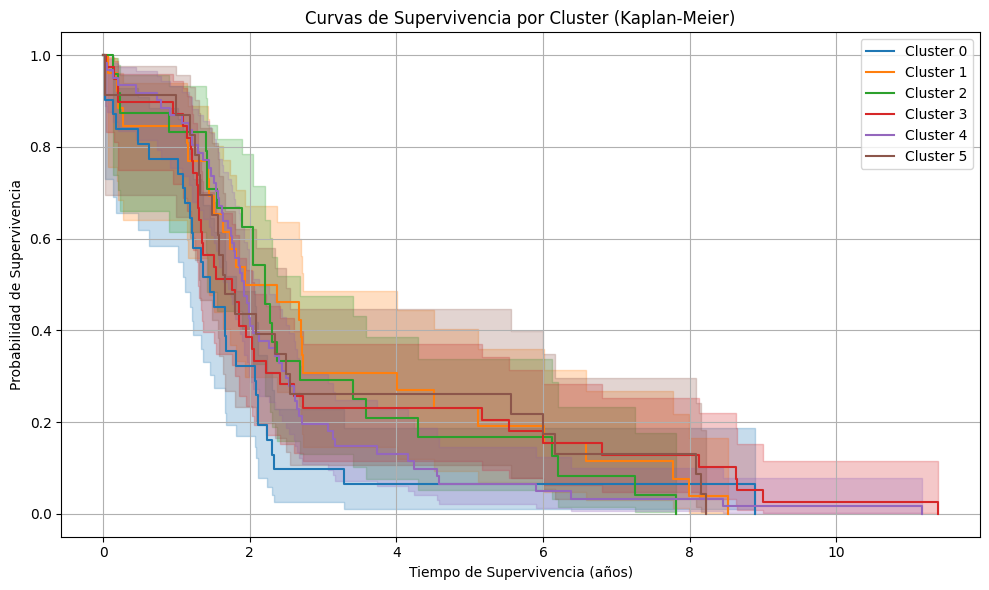

In [ ]:

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Crear un DataFrame con la información necesaria
df_surv = df[['Survival Time (years)', 'Survival Status']].copy()
df_surv['event'] = df_surv['Survival Status'].map({'Alive': 0, 'Dead': 1})

# Asegúrate que los índices coincidan
df_surv = df_surv.reset_index(drop=True)
df_surv['cluster'] = best_labels  # Agregar las etiquetas de clúster

# Filtrar datos sin ruido
df_valid = df_surv[df_surv['cluster'] != -1]

# Graficar curvas de supervivencia por cluster
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for cluster_id in sorted(df_valid['cluster'].unique()):
    grupo = df_valid[df_valid['cluster'] == cluster_id]
    kmf.fit(grupo['Survival Time (years)'], label=f'Cluster {cluster_id}')
    kmf.plot(ci_show=True)

plt.title("Curvas de Supervivencia por Cluster (Kaplan-Meier)")
plt.xlabel("Tiempo de Supervivencia (años)")
plt.ylabel("Probabilidad de Supervivencia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Guardar archivo CSV para R
df_surv_export = df_valid[['Survival Time (years)', 'event', 'cluster']]
df_surv_export.to_csv("supervivencia_clusters.csv", index=False)
print("✅ Archivo 'supervivencia_clusters.csv' exportado.")


✅ Archivo 'supervivencia_clusters.csv' exportado.


In [2]:
if best_labels is not None:
    # Añadir etiquetas de cluster al DataFrame original
    df['Cluster'] = best_labels

    # Guardar DataFrame con etiquetas en un CSV
    df.to_csv('MetaData_con_Clusters.csv', index=False)
    print("Archivo 'MetaData_con_Clusters.csv' guardado correctamente.")


Archivo 'MetaData_con_Clusters.csv' guardado correctamente.
